<a href="https://www.kaggle.com/code/omarabdelfattah2000/supermarket-sales?scriptVersionId=202236317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
data=pd.read_csv(r"/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df=data.copy()
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
83,787-56-0757,C,Naypyitaw,Member,Female,Food and beverages,80.36,4,16.0720,337.5120,2/23/2019,18:45,Credit card,321.44,4.761905,16.0720,8.3
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
740,733-29-1227,C,Naypyitaw,Normal,Male,Home and lifestyle,55.61,7,19.4635,408.7335,3/23/2019,12:41,Cash,389.27,4.761905,19.4635,8.5
490,686-41-0932,B,Mandalay,Normal,Female,Fashion accessories,34.70,2,3.4700,72.8700,3/13/2019,19:48,Ewallet,69.40,4.761905,3.4700,8.2
310,532-59-7201,B,Mandalay,Member,Male,Sports and travel,79.93,6,23.9790,503.5590,1/31/2019,14:04,Cash,479.58,4.761905,23.9790,5.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


**Insights**
- 1- This dataset show details of 3 branches(A,B,C) sales for a supermarket through the first quarter of 2019
- 2- data has 17 columns and 1000 rows
- 3- all columns have no nulls
- 4-Product line feature has 1000 values with 6 unique values
- 5-the highest Product line freq is Fashion accessories with 178 times
- 6-the highest Gender freq is Female with 501 times
- 7-the highest Branch freq is A with 340 times
- 8- The gross margin percentage is a uniform percentage for all products and equals 4.761905%
- 9- The mean of rating feature is 6.97270 and the median is 7
- 10-min rating is 4 and max rating is 10
- 11- the most comon payment method is Ewallet	

In [8]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


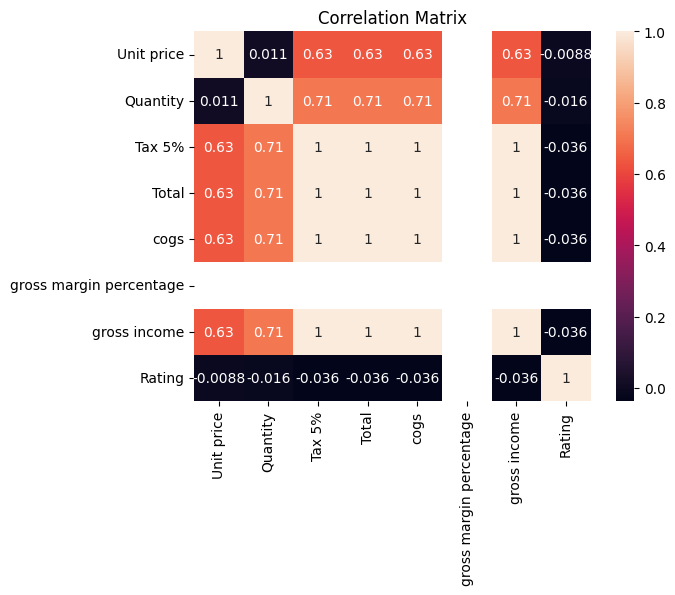

In [9]:
correlation_matrix = df.corr(numeric_only=True) 
sns.heatmap(correlation_matrix,
             annot=True,
             ) 
plt.title('Correlation Matrix') 
plt.show()


In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
branch_income=df.groupby('Branch')['gross income'].sum().sort_values(ascending=False)
branch_income

Branch
C    5265.1765
A    5057.1605
B    5057.0320
Name: gross income, dtype: float64

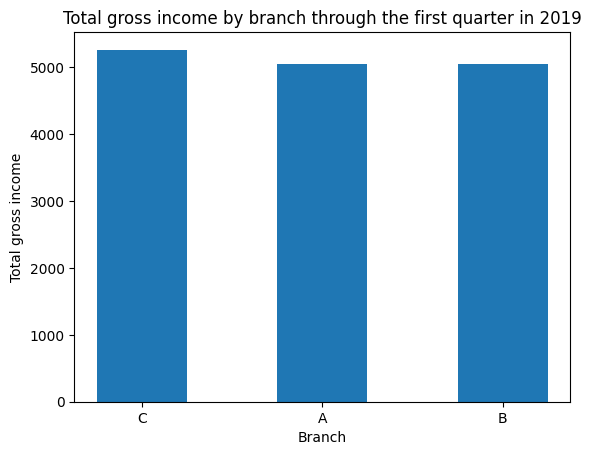

In [12]:
plt.bar(x=branch_income.index,height=branch_income.values,width=0.5)
plt.xlabel('Branch')
plt.ylabel('Total gross income')
plt.title('Total gross income by branch through the first quarter in 2019')
plt.show()

In [13]:
branch_productline_income=df.pivot_table(index='Product line',
                                        columns='Branch',
                                        values='gross income',
                                         aggfunc='sum'
                                        )
branch_productline_income

Branch,A,B,C
Product line,,,
Electronic accessories,872.2435,811.9735,903.2845
Fashion accessories,777.7385,781.5865,1026.6700
Food and beverages,817.2905,724.5185,1131.7550
Health and beauty,599.8930,951.4600,791.2060
Home and lifestyle,1067.4855,835.6745,661.6930
Sports and travel,922.5095,951.8190,750.5680


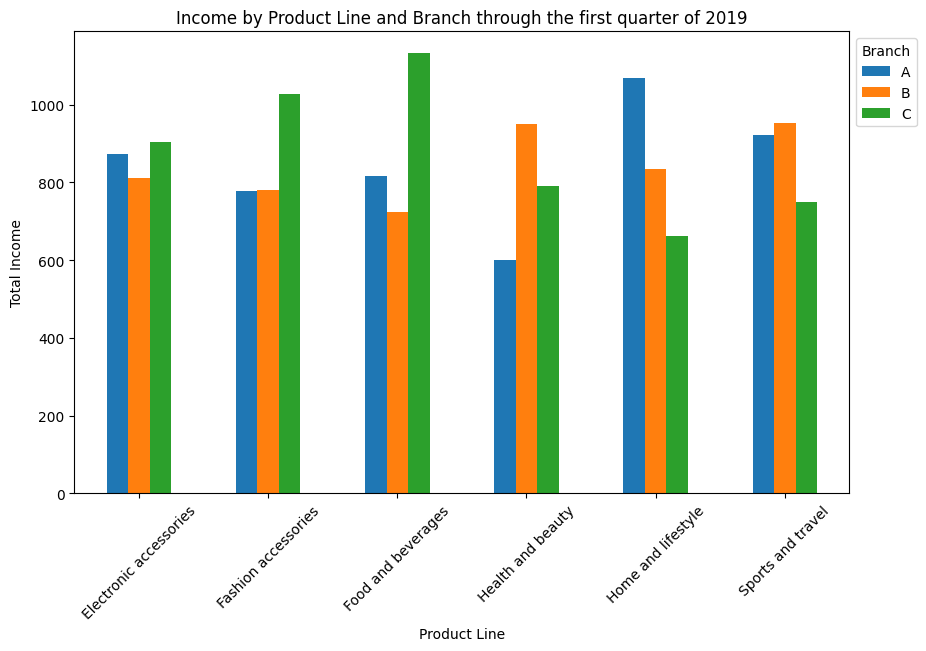

In [14]:
branch_productline_income.plot(kind='bar', stacked=False ,figsize=(10, 6))
plt.title('Income by Product Line and Branch through the first quarter of 2019')
plt.xlabel('Product Line')
plt.ylabel('Total Income')
plt.legend(title='Branch', bbox_to_anchor=(1, 1)) 
plt.xticks(rotation=45)
plt.show()

In [15]:
daily_gross_income=df.pivot_table(index='Date',
                                  columns='Branch',
                                  values='gross income',
                                  fill_value = 0,
                                  aggfunc='sum'
                                 )

In [16]:
fig = px.line(daily_gross_income,
              x=daily_gross_income.index,  
              y=daily_gross_income.columns,
              labels={'value': 'Gross Income', 'index': 'Date'},
              title='Daily Gross Income by Branch through the first quarter of 2019'
             )
fig.show()

In [17]:
monthly_income=df.pivot_table(index='Date',
                              columns='Branch',
                              values='gross income',
                              aggfunc='sum'
                             ).resample('M').sum()
monthly_income

/tmp/ipykernel_18/2707614796.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Branch,A,B,C
Date,,,
2019-01-31,1841.9585,1770.2885,1925.4610
2019-02-28,1421.9105,1639.2510,1568.3325
2019-03-31,1793.2915,1647.4925,1771.3830


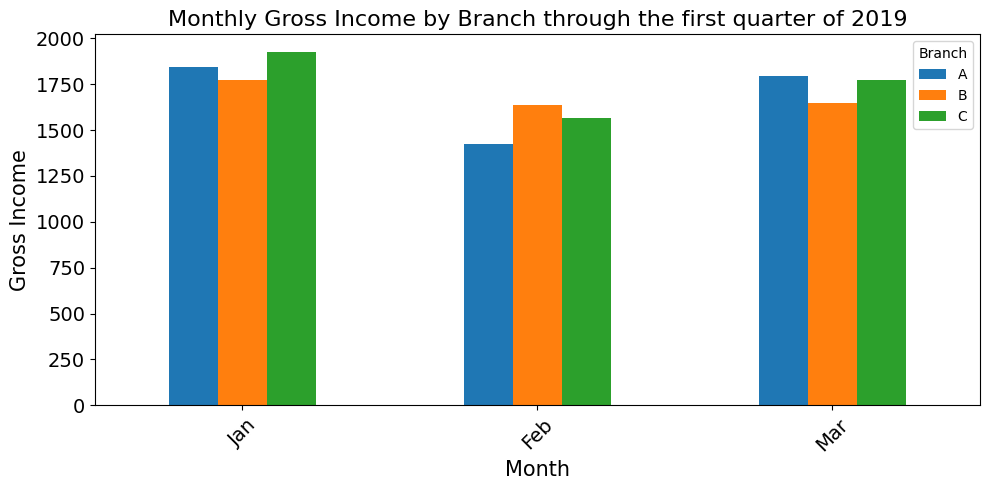

In [18]:
monthly_income.plot(kind='bar', figsize=(10, 5),fontsize=14)
plt.title('Monthly Gross Income by Branch through the first quarter of 2019',fontsize=16)
plt.xlabel('Month',fontsize=15)
plt.gca().set_xticklabels(monthly_income.index.strftime('%b'), rotation=45)
plt.ylabel('Gross Income',fontsize=15)
plt.legend(title='Branch')
plt.tight_layout()
plt.show()

In [19]:
client_type_distribution = df.groupby(['Branch', 'Customer type']).size().unstack()
client_type_distribution

Customer type,Member,Normal
Branch,,
A,167,173
B,165,167
C,169,159


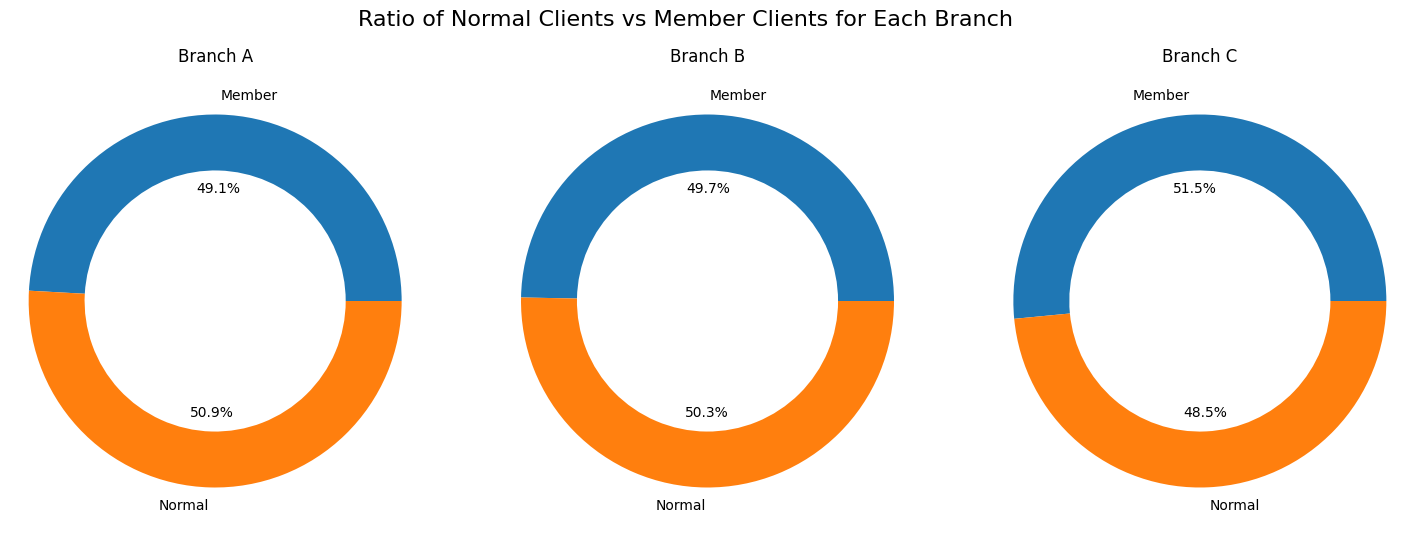

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, branch in enumerate(client_type_distribution.index):
    sizes = client_type_distribution.loc[branch]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=0, wedgeprops={'width': 0.3})
    axes[i].set_title(f'Branch {branch}')
    axes[i].axis('equal')  
plt.suptitle('Ratio of Normal Clients vs Member Clients for Each Branch', fontsize=16)
plt.show()

In [21]:
membership_sales = df.groupby(['Branch', 'Customer type'])['gross income'].sum().unstack()
membership_sales

Customer type,Member,Normal
Branch,,
A,2554.1655,2502.995
B,2557.3660,2499.666
C,2708.6325,2556.544


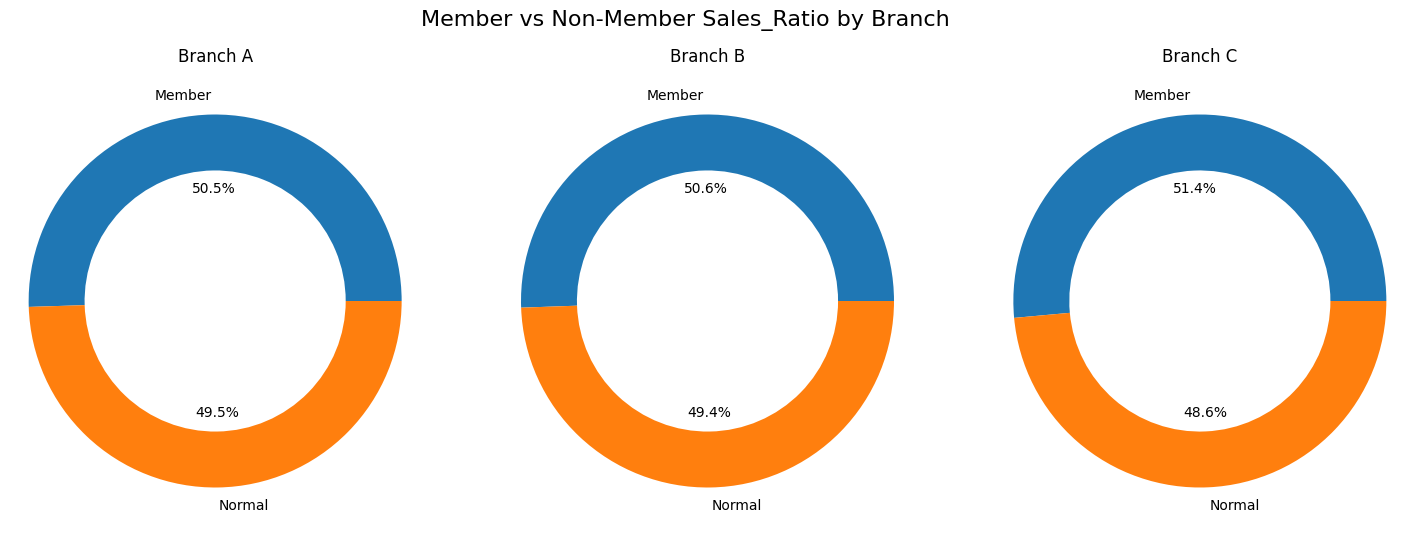

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, branch in enumerate(membership_sales.index):
    sizes = membership_sales.loc[branch]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=0, wedgeprops={'width': 0.3})
    axes[i].set_title(f'Branch {branch}')
    axes[i].axis('equal')  
plt.suptitle('Member vs Non-Member Sales_Ratio by Branch', fontsize=16)
plt.show()

In [23]:
payment_method=df.groupby(['Branch','Payment']).size().unstack()
payment_method

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


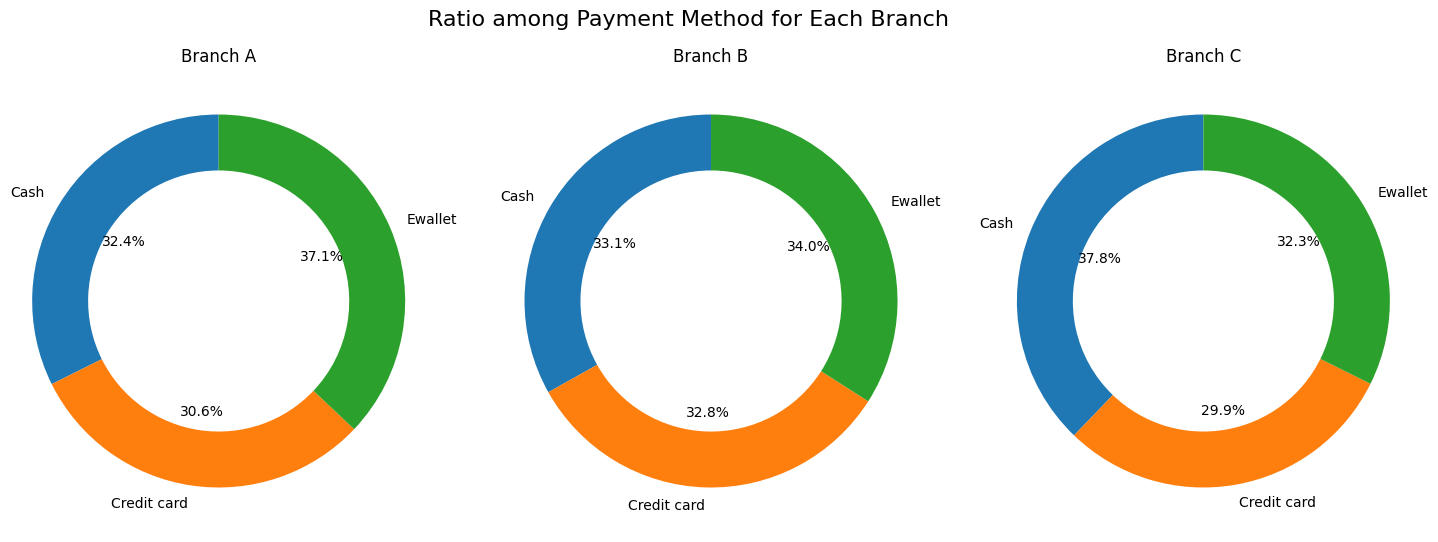

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, branch in enumerate(payment_method.index):
    sizes = payment_method.loc[branch]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
    axes[i].set_title(f'Branch {branch}')
    axes[i].axis('equal')  
plt.suptitle('Ratio among Payment Method for Each Branch', fontsize=16)
plt.show()

In [25]:
members_gender_distribution=df[df['Customer type']=='Member'].groupby(['Branch','Gender']).size().unstack() 
members_gender_distribution

Gender,Female,Male
Branch,,
A,80,87
B,85,80
C,96,73


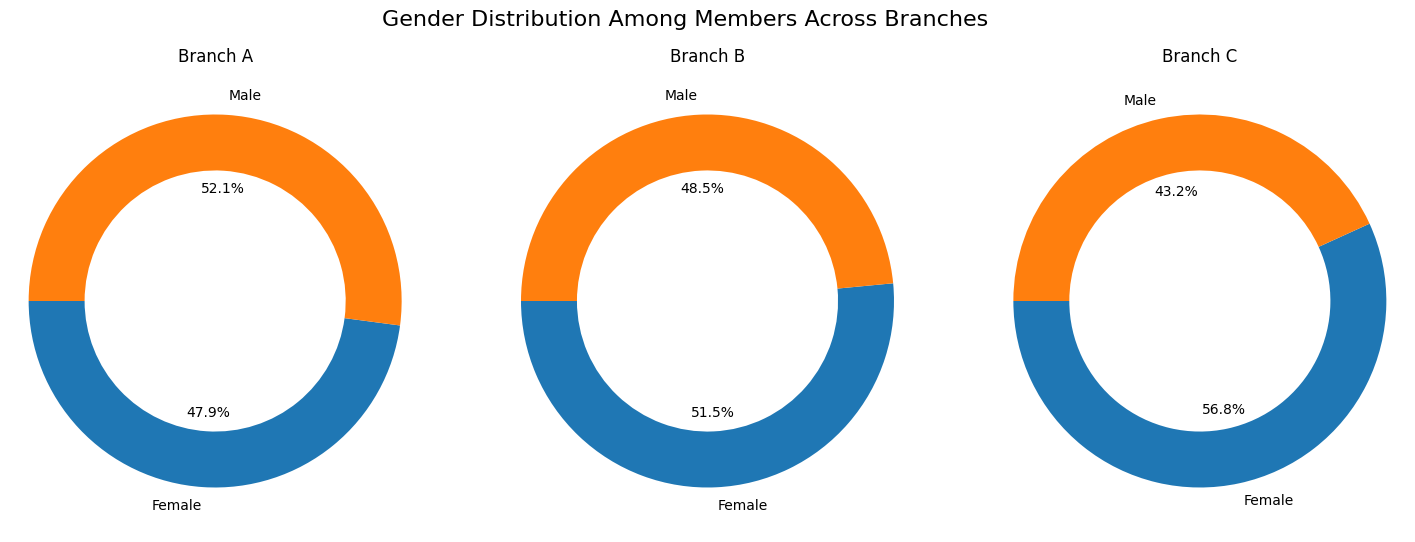

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, branch in enumerate(members_gender_distribution.index):
    sizes = members_gender_distribution.loc[branch]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=180, wedgeprops={'width': 0.3})
    axes[i].set_title(f'Branch {branch}')
    axes[i].axis('equal')  
plt.suptitle('Gender Distribution Among Members Across Branches', fontsize=16)
plt.show()

In [27]:
df_top_rating_by_Productline=df.loc[df.groupby('Product line')['Rating'].idxmax()]
df_top_rating_by_Productline

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0
67,109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.2830,614.9430,2019-01-07,15:01,Ewallet,585.66,4.761905,29.2830,9.9
103,212-62-1842,A,Yangon,Normal,Male,Food and beverages,58.26,6,17.4780,367.0380,2019-03-28,16:44,Cash,349.56,4.761905,17.4780,9.9
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0
188,400-60-7251,A,Yangon,Normal,Male,Home and lifestyle,74.07,1,3.7035,77.7735,2019-02-10,12:50,Ewallet,74.07,4.761905,3.7035,9.9
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0


In [28]:
max_gross_income = df.loc[df.groupby(['Product line', 'Branch'])['gross income'].idxmax()]
min_gross_income = df.loc[df.groupby(['Product line', 'Branch'])['gross income'].idxmin()]
df_summary_branches_income_by_productline = df.groupby(['Product line', 'Branch'])[['gross income', 'Unit price']].agg({
    'gross income': ['max', 'min', 'mean', 'sum'],
    'Unit price': ['max','mean', 'min']
}).assign(
    **{
        'Max Income Date': max_gross_income['Date'].values,
        'Max Income Time': max_gross_income['Time'].values,
        'Max Income Unit Price': max_gross_income['Unit price'].values,
        'Min Income Date': min_gross_income['Date'].values,
        'Min Income Time': min_gross_income['Time'].values,
        'Min Income Unit Price': min_gross_income['Unit price'].values
    }
)[['gross income', 'Max Income Date', 'Max Income Time', 'Max Income Unit Price', 
   'Unit price', 'Min Income Unit Price', 'Min Income Date', 'Min Income Time']]

df_summary_branches_income_by_productline 

gross income                                \
                                       max     min       mean        sum   
Product line           Branch                                              
Electronic accessories A           44.3350  1.4480  14.537392   872.2435   
                       B           44.8785  1.2725  14.763155   811.9735   
                       C           41.1700  1.5120  16.423355   903.2845   
Fashion accessories    A           49.4900  0.6045  15.249775   777.7385   
                       B           41.6250  1.6760  12.606234   781.5865   
                       C           49.6500  0.6270  15.794923  1026.6700   
Food and beverages     A           44.3970  1.5920  14.091216   817.2905   
                       B           42.3150  2.6860  14.490370   724.5185   
                       C           49.2600  1.0790  17.147803  1131.7550   
Health and beauty      A           35.8400  0.9165  12.763681   599.8930   
                       B           43.9350  0.8875  17.952075   951.4600   
                       C           45.2500  1.5370  15.215500   791.2060   
Home and lifestyle     A           45.3250  0.9140  16.422854  1067.4855   
                       B           48.6900  1.6160  16.713490   835.6745   
                       C           48.7500  0.6990  14.704289   661.6930   
Sports and travel      A           44.1405  0.7670  15.635754   922.5095   
                       B           44.9820  1.6490  15.351919   951.8190   
                       C           47.7200  0.5085  16.679289   750.5680   

                              Max Income Date Max Income Time  \
                                                                
Product line           Branch                                   
Electronic accessories A           2019-01-12           14:50   
                       B           2019-03-02           19:42   
                       C           2019-03-29           19:12   
Fashion accessories    A           2019-02-08           16:20   
                       B           2019-01-12           11:25   
                       C           2019-02-15           14:53   
Food and beverages     A           2019-02-19           15:07   
                       B           2019-01-01           11:36   
                       C           2019-01-30           20:23   
Health and beauty      A           2019-02-07           11:28   
                       B           2019-03-29           10:25   
                       C           2019-01-25           13:48   
Home and lifestyle     A           2019-03-08           10:53   
                       B           2019-03-02           17:16   
                       C           2019-01-12           16:18   
Sports and travel      A           2019-02-17           19:41   
                       B           2019-03-09           17:26   
                       C           2019-01-09           13:45   

                              Max Income Unit Price Unit price             \
                                                           max       mean   
Product line           Branch                                               
Electronic accessories A                      88.67      99.56  54.871167   
                       B                      99.73      99.73  49.854182   
                       C                      82.34      99.69  55.809455   
Fashion accessories    A                      98.98      99.10  56.670392   
                       B                      83.25      99.89  54.843871   
                       C                      99.30      99.82  59.736000   
Food and beverages     A                      98.66      99.78  54.974483   
                       B                      84.63      99.69  55.540000   
                       C                      98.52      99.79  57.273030   
Health and beauty      A                      89.60      99.83  49.862340   
                       B                      87.87      99.71  58